In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pymc3 as pm
import pymc3_ext as pmx
import emcee
import arviz as az

In [7]:
def ln_normal(x, mu, var):
    return -0.5 * (np.log(2*np.pi*var) + (x-mu)**2 / var)

In [81]:
def ln_prob(p):
    coseta, sineta = p
    # return ln_normal(np.sqrt(coseta**2 + sineta**2), 5, 0.3)
    return -0.5 * (coseta**2 + sineta**2)

In [93]:
nwalkers = 128
ndim = 2
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_prob)

x0s = np.random.normal(-1, 0.1, size=(nwalkers, ndim))

state = sampler.run_mcmc(x0s, 2000)
sampler.reset()
sampler.run_mcmc(state, 2000);

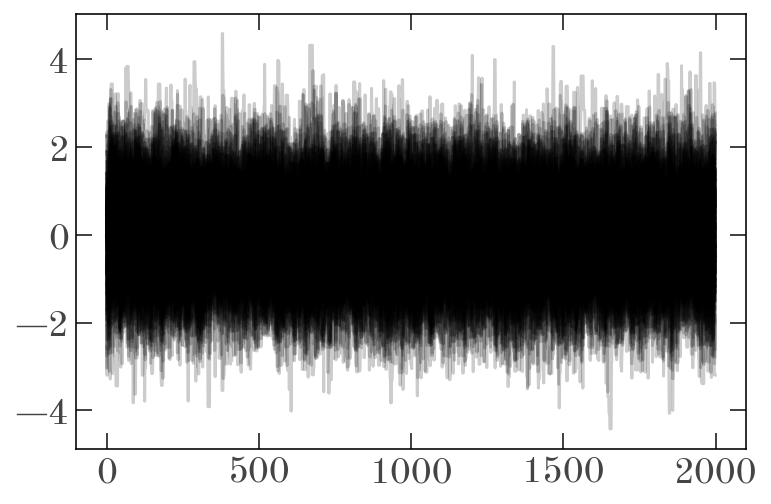

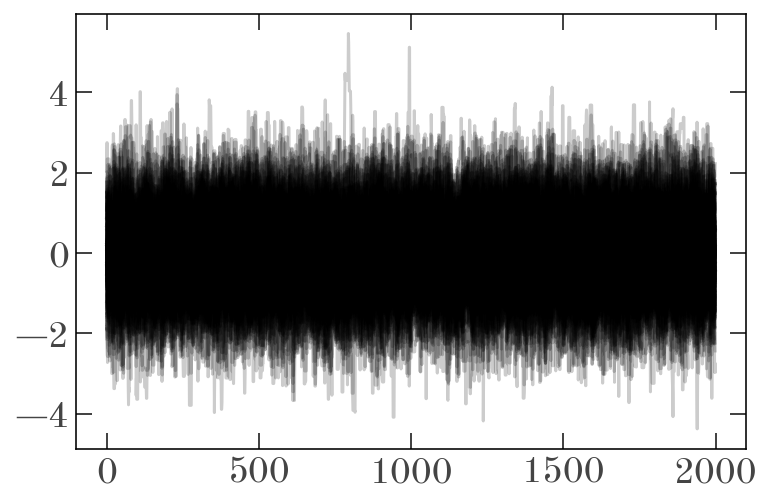

In [94]:
for k in range(sampler.ndim):
    plt.figure()
    for walker in sampler.chain[..., k]:
        plt.plot(walker, color='k', alpha=0.2, marker='')

(-10.0, 10.0)

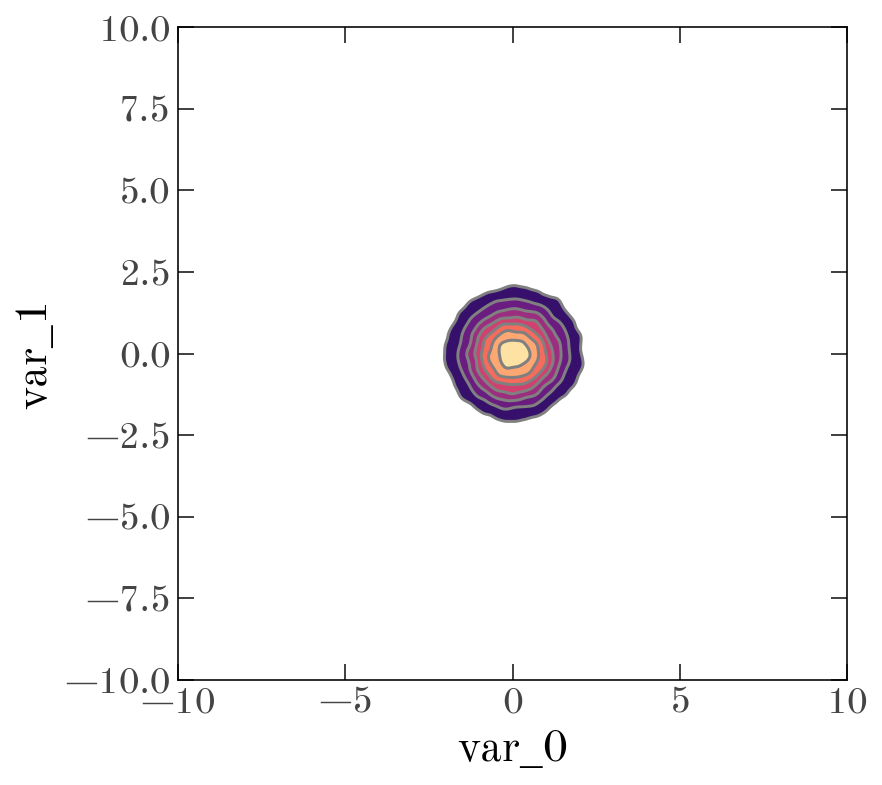

In [95]:
fig, ax = plt.subplots(figsize=(6, 6))
_ = az.plot_pair(az.from_emcee(sampler), kind='kde', ax=ax)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

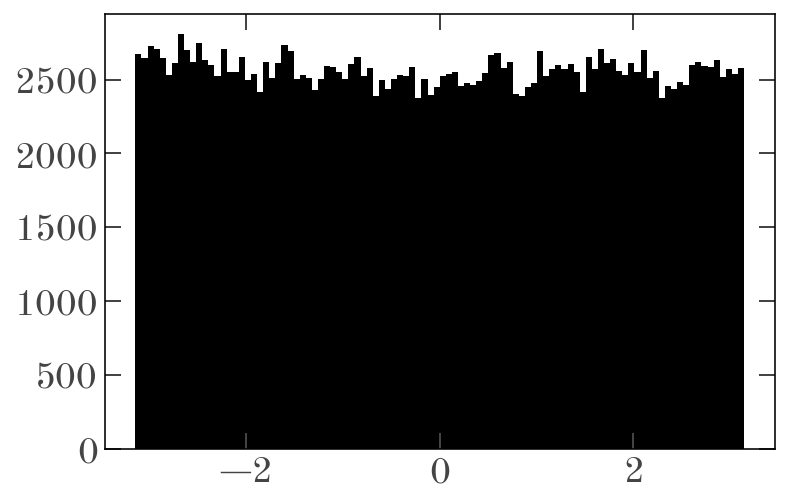

In [96]:
plt.hist(np.ravel(np.arctan2(sampler.chain[..., 0], sampler.chain[..., 1])), bins=100);

(-10.0, 10.0)

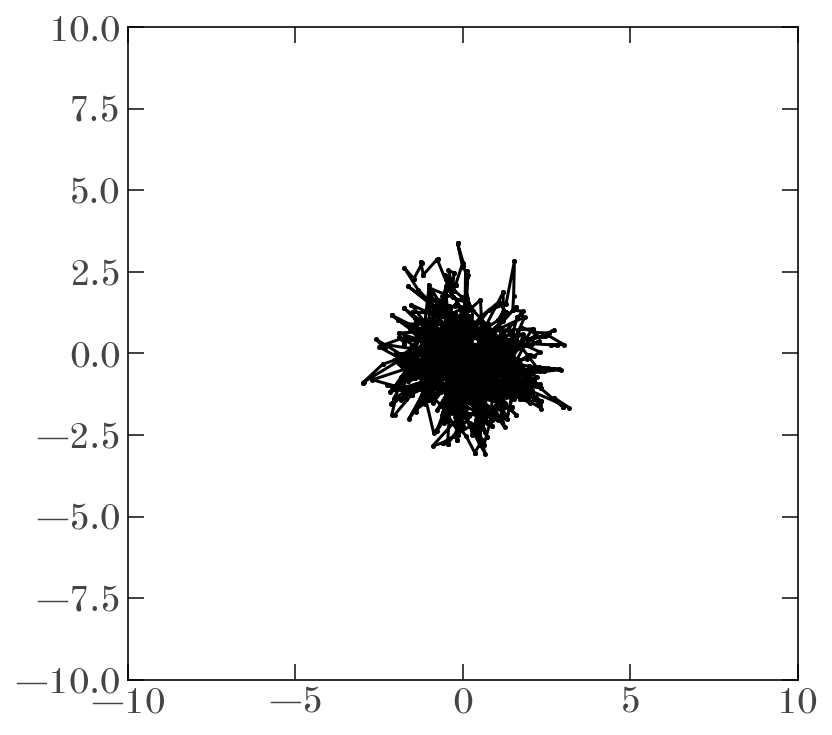

In [97]:
n = 10
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(sampler.chain[n, :, 0], sampler.chain[n, :, 1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

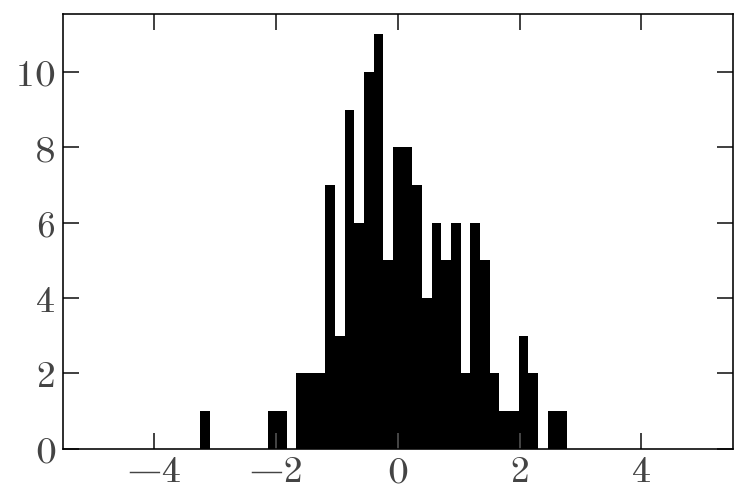

In [99]:
n = -1
plt.hist(sampler.chain[:, n, 0], bins=np.linspace(-5, 5, 64));

---

In [59]:
with pm.Model() as model:
    eta = pmx.Angle('eta', regularized=None)
    eta_angle = pm.Deterministic('eta_angle', eta.transformed)
    pm_samples = pmx.sample(return_inferencedata=True, draws=2000)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


(-10.0, 10.0)

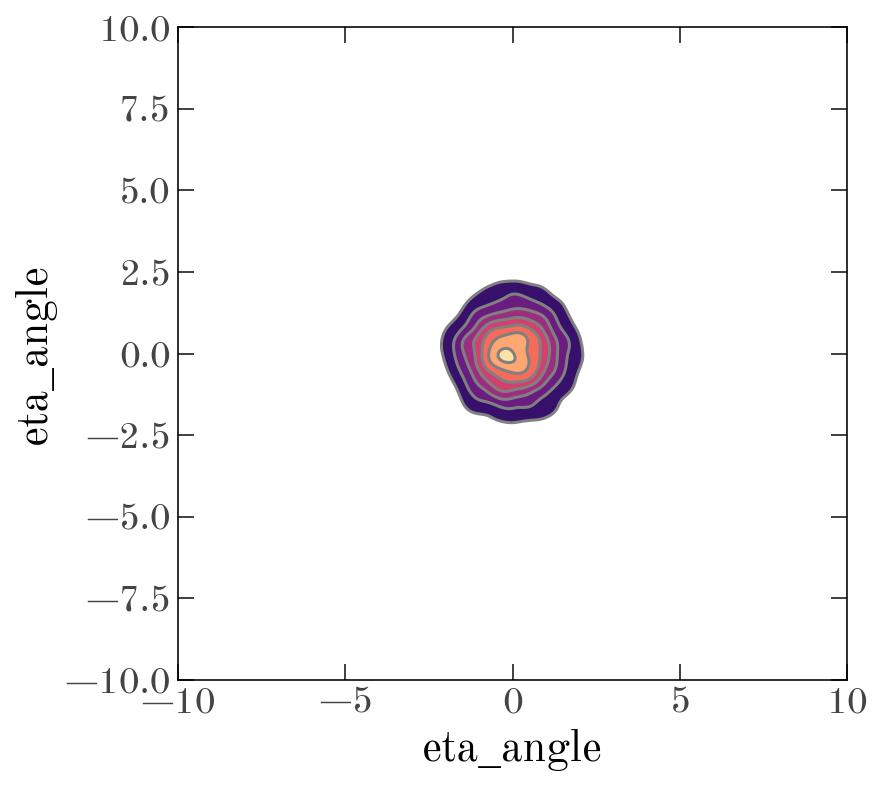

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))
_ = az.plot_pair(pm_samples, kind='kde', ax=ax, var_names=['eta_angle'])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

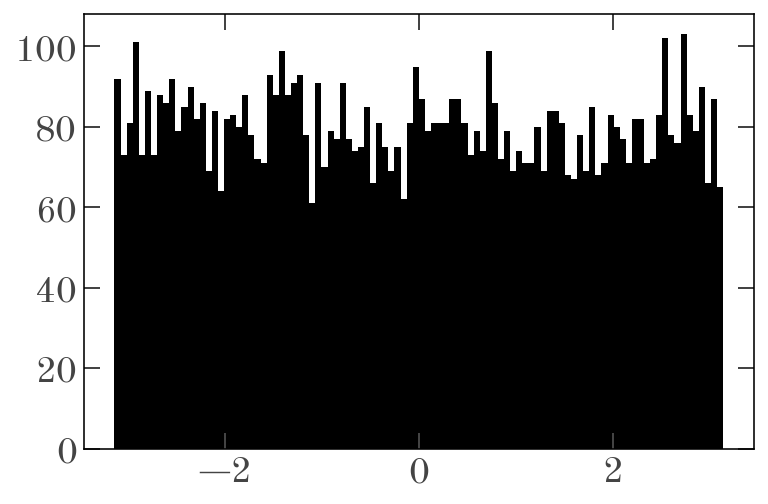

In [61]:
plt.hist(np.ravel(pm_samples.posterior.eta), bins=100);

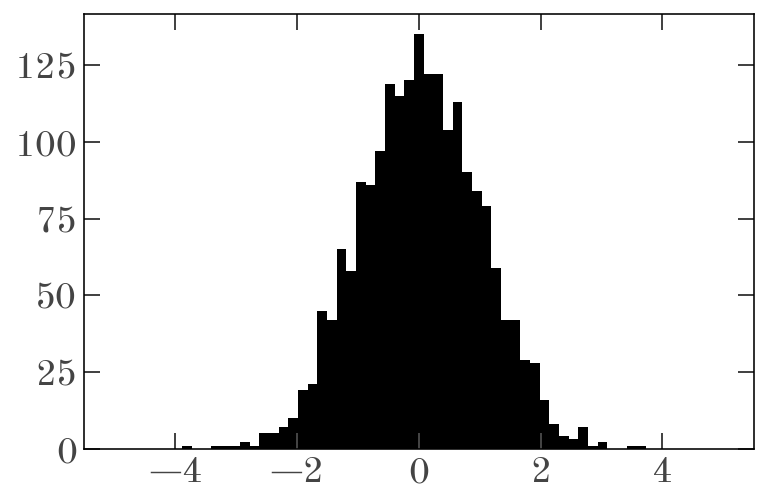

In [78]:
plt.hist(pm_samples.posterior.eta_angle[0, :, 0], bins=np.linspace(-5, 5, 64));

(-10.0, 10.0)

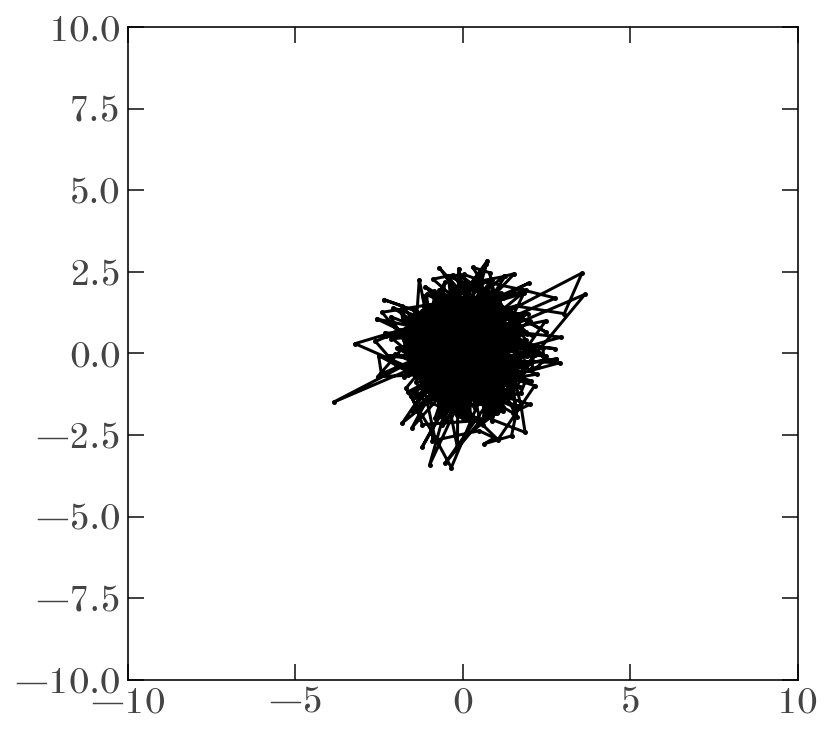

In [75]:
n = 0
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(pm_samples.posterior.eta_angle[n, :1000, 0],
        pm_samples.posterior.eta_angle[n, :1000, 1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)